### Stochastic Gradient Descent classifier

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import matplotlib.cm as cm

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn


In [5]:
(mnist.data).shape
# len(mnist['data'])

(70000, 784)

In [6]:
# Visualizing the data
X , y = mnist['data'], mnist['target']

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [9]:
y = y.astype('float')

In [10]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [11]:
import matplotlib.cm as cm
import matplotlib
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("on")

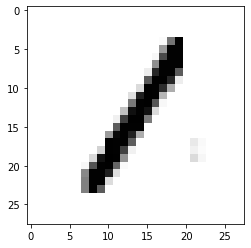

In [12]:
plot_digit(X[9999])

In [13]:
# Exercise

np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

In [14]:
# Splitting the dataset into the Training set and Test   set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle =True, random_state = 42)

In [15]:
# reorder_train
# X

In [16]:
# Trainging a binary classifier
y_train_0 = (y_train == 0)
y_train_0


array([False, False, False, ..., False,  True, False])

In [17]:
print(y_train[-2:])

[0. 2.]


In [18]:
y_test_0 = (y_test == 0)
y_test_0


array([False, False, False, ..., False, False, False])

In [19]:
# SGDclassifier Training

from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='log', random_state=42)
classifier.fit(X_train, y_train_0)


SGDClassifier(loss='log', random_state=42)

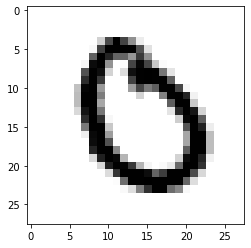

In [20]:
plot_digit(X[2222])
 

In [21]:
classifier.predict(X[2222].reshape(1, -1))

array([ True])

In [28]:
# performance measures
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=42)

skfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)

In [29]:
for train_index , test_index in skfold.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9885894894734023
0.989821610328387
0.9823207971713276


In [30]:
# Method 2 cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_0, cv=10, scoring='accuracy')

array([0.98767857, 0.98857143, 0.98732143, 0.98446429, 0.98839286,
       0.97642857, 0.96482143, 0.98839286, 0.98964286, 0.98732143])

In [31]:
# Danger of Blindly Applying Evaluators as perfomance measures
1-sum(y_train_0) / len(y_train_0)

0.9008214285714286

In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)
confusion_matrix(y_train_0, y_train_pred)

array([[49841,   605],
       [  188,  5366]], dtype=int64)

In [33]:
# precision  5366 / (605 + 5366)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred)


0.8986769385362586

In [34]:
# Recall  ( TP / (TP + FN)  )
recall_score(y_train_0, y_train_pred)

0.9661505221462009

In [37]:
# f1 score ( 2 * (precision * recall / (precision + recall)))
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9311930585683298

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train_0, y_train_pred))
print('\n')
print(classification_report(y_train_0, y_train_pred))

[[49841   605]
 [  188  5366]]


              precision    recall  f1-score   support

       False       1.00      0.99      0.99     50446
        True       0.90      0.97      0.93      5554

    accuracy                           0.99     56000
   macro avg       0.95      0.98      0.96     56000
weighted avg       0.99      0.99      0.99     56000



In [41]:
# model Comparision
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
r_clf = RandomForestClassifier(random_state=42,n_estimators=100)


In [42]:
y_probas_forest = cross_val_predict(r_clf, X_train, y_train_0, cv=3, method='predict_proba')

In [43]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_train_0, y_scores_forest)


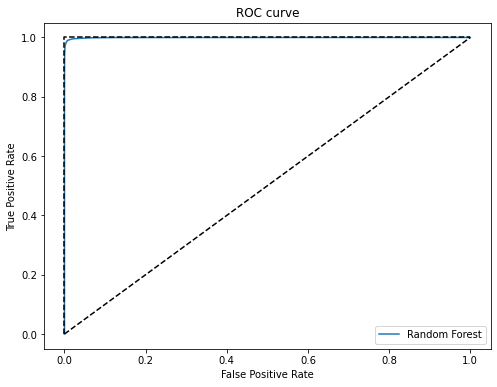

In [48]:
plt.figure(figsize=(8, 6))
# plt.plot(recall_score,precision_score,label='SGDClassifier')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0, 1], [0, 1, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



In [49]:
roc_auc_score(y_train_0, y_scores_forest)

0.9994138492782658

In [50]:
r_clf.fit(X_train, y_train_0)

RandomForestClassifier(random_state=42)

In [51]:
y_train_rf = cross_val_predict(r_clf, X_train, y_train_0, cv=3)

In [52]:
precision_score_rf = precision_score(y_train_0, y_train_rf)

In [53]:
recall_score_rf = recall_score(y_train_0, y_train_rf)


In [54]:
confusion_matrix(y_train_0, y_train_rf)
print('\n')
print(classification_report(y_train_0, y_train_rf))



              precision    recall  f1-score   support

       False       0.99      1.00      1.00     50446
        True       0.99      0.95      0.97      5554

    accuracy                           0.99     56000
   macro avg       0.99      0.98      0.98     56000
weighted avg       0.99      0.99      0.99     56000

